In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Churn_Modelling.csv',decimal=',')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0


In [4]:
data.shape

(10000, 14)

In [5]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000,10000.000000,10000.00000,10000.000000,10000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,6382,NaN,NaN,NaN,9999,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,0,NaN,NaN,NaN,24924.92,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,3617,NaN,NaN,NaN,2,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,NaN,1.530200,0.70550,0.515100,NaN,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,NaN,0.581654,0.45584,0.499797,NaN,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,NaN,1.000000,0.00000,0.000000,NaN,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,NaN,1.000000,0.00000,0.000000,NaN,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,NaN,1.000000,1.00000,1.000000,NaN,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,NaN,2.000000,1.00000,1.000000,NaN,0.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RowNumber        10000 non-null  int64 
 1   CustomerId       10000 non-null  int64 
 2   Surname          10000 non-null  object
 3   CreditScore      10000 non-null  int64 
 4   Geography        10000 non-null  object
 5   Gender           10000 non-null  object
 6   Age              10000 non-null  int64 
 7   Tenure           10000 non-null  int64 
 8   Balance          10000 non-null  object
 9   NumOfProducts    10000 non-null  int64 
 10  HasCrCard        10000 non-null  int64 
 11  IsActiveMember   10000 non-null  int64 
 12  EstimatedSalary  10000 non-null  object
 13  Exited           10000 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1.1+ MB


In [7]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
for col in data.columns.values:
    if data[col].dtype == 'int64':
        continue
    else:
        data[col] = pd.get_dummies(data[col], drop_first = True)

<AxesSubplot:>

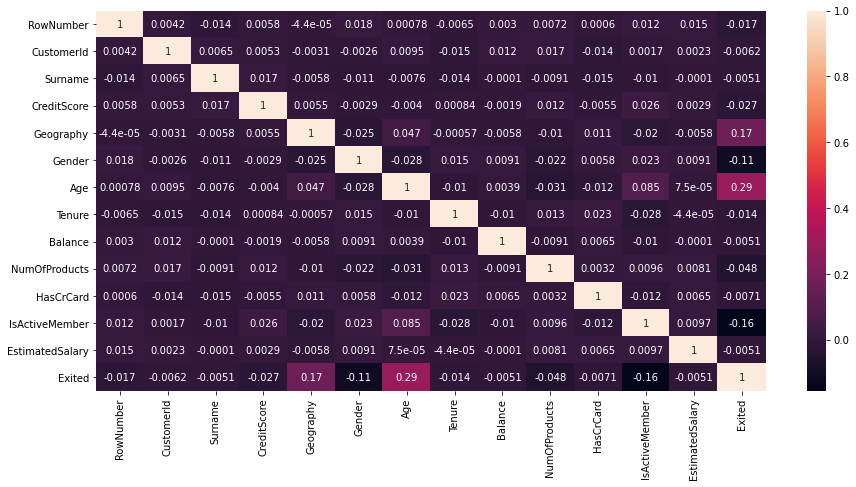

In [9]:
plt.figure(figsize = (15,7))
sns.heatmap(data.corr(), annot=True,fmt='.2g')

<AxesSubplot:xlabel='Exited', ylabel='count'>

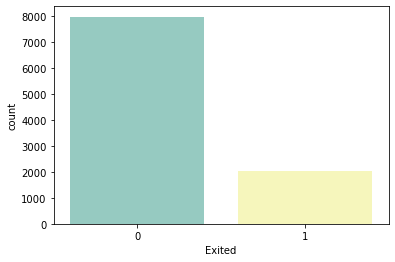

In [10]:
sns.countplot(x='Exited', palette="Set3", data=data)

In [11]:
categorical_labels = [['Gender', 'Geography'], ['HasCrCard', 'IsActiveMember']]
colors = [['Set1', 'Set2'], ['Set3', 'PuRd']]
categorical_labels

[['Gender', 'Geography'], ['HasCrCard', 'IsActiveMember']]

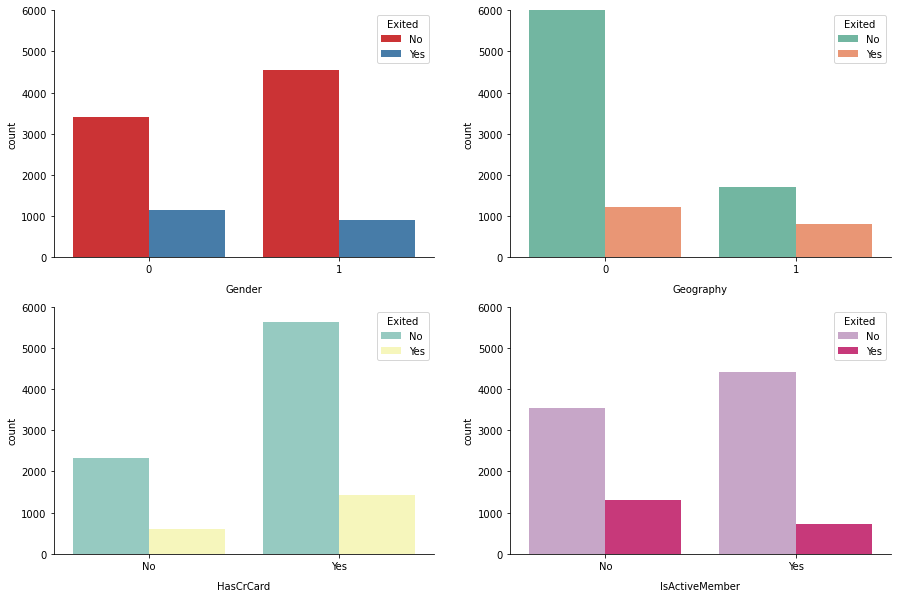

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for i in range(2):
    for j in range(2):
        feature = categorical_labels[i][j]
        color = colors[i][j]
        ax1 = sns.countplot(x = feature, hue = 'Exited', palette = color, data = data, ax = ax[i][j])
        ax1.set_xlabel(feature, labelpad = 10)
        ax1.set_ylim(0, 6000)
        ax1.legend(title = 'Exited', labels = ['No', 'Yes'])
        if i == 1:
            ax1.set_xticklabels(['No', 'Yes'])
sns.despine()

In [13]:
x = data.drop(['Exited', 'EstimatedSalary', 'Balance', 'Age', 'CreditScore'], axis=1)
y = data['Exited']

In [28]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [29]:
for label in ['Gender', 'Geography']:
    le = preprocessing.LabelEncoder()
    le.fit(x[label])
    print(le.classes_)
    x.loc[:, label] = le.transform(x[label])

[0 1]
[0 1]


In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=True, stratify=y)

In [33]:
param_grid = {'max_depth': [3, 5, 6],'max_features': [2, 4, 6],'n_estimators':[50, 100],'min_samples_split': [3, 5, 7]}
random_forest = RandomForestClassifier()
random_forest_grid = GridSearchCV(random_forest, param_grid, cv=5, refit=True, verbose=3, n_jobs=-2)
random_forest_grid.fit(x, y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  18 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-2)]: Done 114 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-2)]: Done 270 out of 270 | elapsed:   46.7s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-2,
             param_grid={'max_depth': [3, 5, 6], 'max_features': [2, 4, 6],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [50, 100]},
             verbose=3)

In [31]:
best_rf_estimator = RandomForestClassifier(max_depth=6, 
                                           max_features=6, 
                                           min_samples_split=3, 
                                           n_estimators=100)

best_rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=6, min_samples_split=3)

In [32]:
rf_predict_test = best_rf_estimator.predict(X_test)
accuracy_score(y_test, rf_predict_test)
print(classification_report(y_test, rf_predict_test))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1593
           1       0.66      0.24      0.35       407

    accuracy                           0.82      2000
   macro avg       0.75      0.60      0.62      2000
weighted avg       0.80      0.82      0.78      2000

